# Загрузка и обработка данных

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Скачиваем данные вручную или через git-lfs
# !curl -o dataset.tskv https://raw.githubusercontent.com/yandex/geo-reviews-dataset-2023/master/geo-reviews-dataset-2023.tskv

# Из Colab можно склонировать репозиторий
!git clone https://github.com/yandex/geo-reviews-dataset-2023.git

fatal: destination path 'geo-reviews-dataset-2023' already exists and is not an empty directory.


In [ ]:
def parse_tskv_line(line):
    # Разделяем строку по табуляции и создаём словарь из пар ключ-значение.
    return dict(item.split('=', 1) for item in line.strip().split('\t'))

# Чтение файла строка за строкой и преобразование каждой строки через parse_tskv_line
with open('geo-reviews-dataset-2023/geo-reviews-dataset-2023.tskv', 'r') as file:
    data = [parse_tskv_line(line) for line in file]

# Создание DataFrame из списка словарей
df = pd.DataFrame(data)

# Вывод первых нескольких строк DataFrame
df.head()

,address,name_ru,rating,rubrics,text
0,"Екатеринбург, ул. Московская / ул. Волгоградск...",Московский квартал,3.,Жилой комплекс,Московский квартал 2.\nШумно : летом по ночам ...
1,"Московская область, Электросталь, проспект Лен...",Продукты Ермолино,5.,Магазин продуктов;Продукты глубокой заморозки;...,"Замечательная сеть магазинов в общем, хороший ..."
2,"Краснодар, Прикубанский внутригородской округ,...",LimeFit,1.,Фитнес-клуб,"Не знаю смутят ли кого-то данные правила, но я..."
3,"Санкт-Петербург, проспект Энгельса, 111, корп. 1",Snow-Express,4.,Пункт проката;Прокат велосипедов;Сапсёрфинг,Хорошие условия аренды. \nДружелюбный персонал...
4,"Тверь, Волоколамский проспект, 39",Студия Beauty Brow,5.,"Салон красоты;Визажисты, стилисты;Салон бровей...",Топ мастер Ангелина топ во всех смыслах ) Немн...


In [ ]:
# Убираем пустые значения оценок
df = df[df['rating'] != '0.']

# Делаем классы от 0 до 4 для удобства обучения
df["label"] = df.rating.apply(lambda x: int(x[0]) - 1)

# Поменяли имя колонки с 'rating' на 'label'
df = df.drop(columns=['rating'])

In [ ]:
df.head()

,address,name_ru,rubrics,text,label
0,"Екатеринбург, ул. Московская / ул. Волгоградск...",Московский квартал,Жилой комплекс,Московский квартал 2.\nШумно : летом по ночам ...,2
1,"Московская область, Электросталь, проспект Лен...",Продукты Ермолино,Магазин продуктов;Продукты глубокой заморозки;...,"Замечательная сеть магазинов в общем, хороший ...",4
2,"Краснодар, Прикубанский внутригородской округ,...",LimeFit,Фитнес-клуб,"Не знаю смутят ли кого-то данные правила, но я...",0
3,"Санкт-Петербург, проспект Энгельса, 111, корп. 1",Snow-Express,Пункт проката;Прокат велосипедов;Сапсёрфинг,Хорошие условия аренды. \nДружелюбный персонал...,3
4,"Тверь, Волоколамский проспект, 39",Студия Beauty Brow,"Салон красоты;Визажисты, стилисты;Салон бровей...",Топ мастер Ангелина топ во всех смыслах ) Немн...,4


# Загрузка dataset

In [ ]:
! pip install datasets
! pip install -U accelerate
! pip install -U transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.3/527.3 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.2 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 17.0.0 which is incompatible.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.1/315.1 kB 11.2 MB/s eta 0:00:00
  Attempting uninstall: accelerate
    Found existing installation: accelerate 0.32.1
    Uninstalling accelerate-0.32.1:
      Successfully uninstalled accelerate-0.32.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 25.7 MB/s eta 0:00:00
ERROR: Operation cancelled by user


In [ ]:
from datasets import load_dataset, Dataset
from transformers import AutoModelForSequenceClassification, AutoTokenizer
import torch

## Dataset Analysis

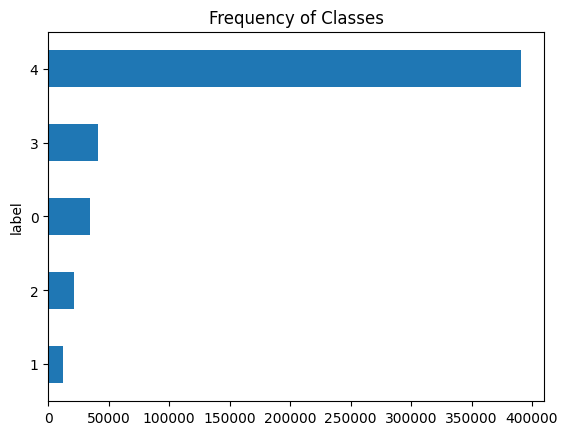

In [ ]:
import matplotlib.pyplot as plt

df["label"].value_counts(ascending=True).plot.barh()
plt.title("Frequency of Classes")
plt.show()

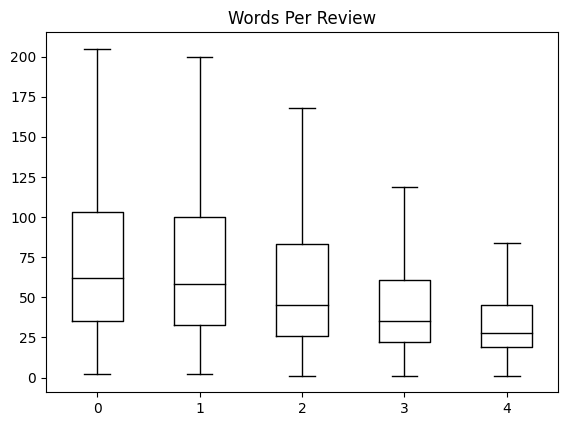

In [ ]:
df["Words Per Review"] = df["text"].str.split().apply(len)
df.boxplot("Words Per Review", by="label", grid=False,
          showfliers=False, color="black")
plt.suptitle("")
plt.xlabel("")
plt.show()

## train/test split

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.10, stratify=df.label)

In [ ]:
train_rawdataset = Dataset.from_pandas(train)
test_rawdataset = Dataset.from_pandas(test)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
model_name = "DeepPavlov/rubert-base-cased"
tokenizer = BertTokenizer.from_pretrained(model_name, model_max_length=512)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=5).to(device)  # Adjust num_labels for your task

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/24.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/1.65M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at DeepPavlov/rubert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
for param in model.parameters () : param.data = param.data.contiguous ()

## Токенизация

In [ ]:
def preprop(sample):
  return tokenizer(sample['text'], truncation=True)

In [ ]:
tokenized_train = train_rawdataset.map(preprop, batched=True)
tokenized_test = test_rawdataset.map(preprop, batched=True)

Map:   0%|          | 0/449820 [00:00<?, ? examples/s]

Map:   0%|          | 0/49980 [00:00<?, ? examples/s]

In [ ]:
from transformers import DataCollatorWithPadding

In [ ]:
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [ ]:
from transformers import TrainingArguments

training_args = TrainingArguments("test-trainer", eval_strategy="epoch")

In [ ]:
from transformers import Trainer

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1}

In [ ]:
batch_size = 16
logging_steps = len(tokenized_train) // batch_size
model_name = (f"{model_name} - finetuned_reviews")
training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=5,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  eval_strategy="epoch",
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,

                                  log_level="error"
                                  )

In [ ]:
trainer = Trainer(
    model = model,
    args = training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_test,
    data_collator=data_collator,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics

)

In [ ]:
torch.cuda.memory_summary(device=None, abbreviated=False)

'|===========================================================================|\n|                  PyTorch CUDA memory summary, device ID 0                 |\n|---------------------------------------------------------------------------|\n|            CUDA OOMs: 2            |        cudaMalloc retries: 3         |\n|===========================================================================|\n|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |\n|---------------------------------------------------------------------------|\n| Allocated memory      |  14798 MiB |  14798 MiB |  18347 MiB |   3548 MiB |\n|       from large pool |  14792 MiB |  14792 MiB |  18288 MiB |   3495 MiB |\n|       from small pool |      5 MiB |      6 MiB |     58 MiB |     53 MiB |\n|---------------------------------------------------------------------------|\n| Active memory         |  14798 MiB |  14798 MiB |  18347 MiB |   3548 MiB |\n|       from large pool |  14792 MiB |  14792 MiB |

In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.385500,0.296379,0.891136,0.879963
2,0.313500,0.213666,0.929472,0.927205


In [ ]:
path_to_save = f"{model_name} - finetuned_reviews_2"
model.save_pretrained(path_to_save)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Загрузка тестовых данных и разметка

In [ ]:
with open('test.tskv', 'r') as file:
    data = [parse_tskv_line(line) for line in file]

df_test = pd.DataFrame(data)
df_test.head()

,address,name_ru,rubrics,text
0,"Московская обл., Электроугли, ул. Школьная, вб...",Школьная,Жилой комплекс,Как то он выгледит по другому и не так красиво...
1,"Москва, Ленинский проспект, 34/1",Банк ВТБ,Банк,Не решили вопрос \nВ приложении втб прислали с...
2,"Москва, улица Плеханова, 17, стр. 6",Перово Плаза,Гостиница,"Ужасное место,при заезде не могли никак засели..."
3,"Москва, Каширское шоссе, 57, корп. 4",Пятёрочка,Супермаркет,Всегда нереально медленные кассиры
4,"Москва, Головинское шоссе, 5, корп. 1",О'кей,Продуктовый гипермаркет;Гипермаркет,Самое ужасное мясо на развес. Всегда продают т...


In [ ]:
def predict_rating(row):
    # return str(predict(row['text'], row['address'], row['name_ru'], row['rubrics']) + 1) + '.'
    return '1.'

# Предсказываем классы
df_test['rating'] = df_test.apply(predict_rating, axis=1)
df_test.head()

,address,name_ru,rubrics,text,rating
0,"Московская обл., Электроугли, ул. Школьная, вб...",Школьная,Жилой комплекс,Как то он выгледит по другому и не так красиво...,1.
1,"Москва, Ленинский проспект, 34/1",Банк ВТБ,Банк,Не решили вопрос \nВ приложении втб прислали с...,1.
2,"Москва, улица Плеханова, 17, стр. 6",Перово Плаза,Гостиница,"Ужасное место,при заезде не могли никак засели...",1.
3,"Москва, Каширское шоссе, 57, корп. 4",Пятёрочка,Супермаркет,Всегда нереально медленные кассиры,1.
4,"Москва, Головинское шоссе, 5, корп. 1",О'кей,Продуктовый гипермаркет;Гипермаркет,Самое ужасное мясо на развес. Всегда продают т...,1.


In [ ]:
with open('test_with_rating.tskv', 'w') as file:
    for index, row in df_test.iterrows():
        line = ''
        for column in df_test.columns:
            line += f'{column}={row[column]}\t'
        print(line.strip(), end='\n', file=file)

In [ ]:
with open('test_with_rating.tskv', 'r') as file:
    data = [parse_tskv_line(line) for line in file]

df_test = pd.DataFrame(data)
df_test.head()

,address,name_ru,rubrics,text,rating
0,"Московская обл., Электроугли, ул. Школьная, вб...",Школьная,Жилой комплекс,Как то он выгледит по другому и не так красиво...,1.
1,"Москва, Ленинский проспект, 34/1",Банк ВТБ,Банк,Не решили вопрос \nВ приложении втб прислали с...,1.
2,"Москва, улица Плеханова, 17, стр. 6",Перово Плаза,Гостиница,"Ужасное место,при заезде не могли никак засели...",1.
3,"Москва, Каширское шоссе, 57, корп. 4",Пятёрочка,Супермаркет,Всегда нереально медленные кассиры,1.
4,"Москва, Головинское шоссе, 5, корп. 1",О'кей,Продуктовый гипермаркет;Гипермаркет,Самое ужасное мясо на развес. Всегда продают т...,1.
